<a href="https://colab.research.google.com/github/patwalbhumika/DigitRecognition/blob/main/DigitRecognitionCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

handwritten digit recognition CNN using tensorflow in collab with MSpaint

In [1]:
import tensorflow as tf

Loading MNIST Dataset with 60k training and 10k testing data samples
tensorflow already contains MNIST dataset which can be loaded using Keras(tensorflow's API)

In [3]:
mnist=tf.keras.datasets.mnist
#dataset of handwritten 28 x 28 pixels 0-9 digits

In [ ]:
#unpacking dataset into training and testing data
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
#size
x_train.shape

In [6]:
import matplotlib.pyplot as plt

In [ ]:
#plot the graph
plt.imshow(x_train[1])
plt.show()  #color image
plt.imshow(x_train[1], cmap=plt.cm.binary)  #to show binary image
plt.axis("off") #to remove axes

checking value of each pixel before normalization
*gray level(1 channel=>0 to 255)*


In [ ]:
print(x_train[1])

PRE-PROCESSING STEP      

normalizing data->scaling features of dataset to similar range,           

normalization is done in order to prevent situation if digit is any other color,it;ll be brought back to 0 and 1

In [ ]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[1] , cmap=plt.cm.binary)
plt.axis("off")

In [ ]:
#x contains all features values of digits as NumPy array
#after normalization (all values are in range 0 and 1)
print(x_train[1])

In [ ]:
#y contaons all corresponding values of features in the form of NumPy array
print(y_train[1])

RESIZING IMAGE TO MAKE IT SUITABLE TO APPLY CONVOLUTION OPERATION

In [20]:
import numpy as np
#we need to convert image into 28 x 28 pixels
IMAGE_SIZE=28
#we need an extra dimension to further perform Convolution operation
x_trainr = np.array(x_train).reshape(-1 , IMAGE_SIZE , IMAGE_SIZE , 1)
x_testr = np.array(x_test).reshape(-1 ,IMAGE_SIZE , IMAGE_SIZE , 1)
print("TRAINING Samples Dimensions" , x_trainr.shape)
print("TESTING Samples Dimension", x_testr.shape)

TRAINING Samples Dimensions (60000, 28, 28, 1)
TESTING Samples Dimension (10000, 28, 28, 1)




**Creating a DEEP NEURAL NETWORK**


Training on 60k samples of MNIST Dataset

In [22]:
from tensorflow.keras.models import Sequential #connects diff deep learning layers
#names of diff layers
from tensorflow.keras.layers import Dense ,Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [24]:
#creating a neural network layer
model=Sequential()

#first convolution layer (60k,28,28,1)
#no. of kernels /filter =64 , each filter size=3 x 3
model.add(Conv2D (64, (3,3), input_shape= x_trainr.shape[1:]))#28-3+1= 26 x 26
#activation function to make it non-linear , if>0 then allow else remove
model.add(Activation ( "relu")) #26/2=13 layer size

#maxpooline function to get maximum value of 2 x 2 and drop rest values
#propogating only max value to the next layer
model.add(MaxPooling2D (pool_size = (2,2)))

#2nd Convolution layer
model.add(Conv2D (64, (3,3))) #13-3=1=11
model.add(Activation ( "relu"))
model.add(MaxPooling2D (pool_size = (2,2))) #11/2=5

#3rd Convolution layer
model.add(Conv2D (64, (3,3 ) ) ) #5-3+1=3
model.add(Activation ( "relu"))
model.add(MaxPooling2D (pool_size = (2,2 ) ) ) #3/2=1

#fully Connected Layer 1
model.add (Flatten() )  #20x20=400 2D to 1D conversion
model.add (Dense(64) ) #neural network(64 neurons)
model.add (Activation("relu"))

#fully connected Layer2
model.add(Dense(32))
model.add(Activation("relu"))

#last fully connected layer, output must be equal to number of classes=10(0-9)
model.add(Dense(10)) #last layer must be equal to 10
model.add(Activation("softmax")) #softmax- class probabilities
#in case eof binary classification, 1 neuron in dense layer,activation with 'sigmoid' instead of 'softmax'

In [ ]:
model.summary()

In [26]:
print("total training samples = " , len(x_trainr))

total training samples =  60000


In [27]:
#compiling my model
model.compile(loss= "sparse_categorical_crossentropy",optimizer="adam", metrics=['accuracy'])


**Training my model**

data->x_trainr , label->y_train

epochs  ->  no. of times the model will iterate over the entire training dataset during the training process
30% of the training data will be used for validation(model's performance on unseen data during training),70% will be used for training

In [33]:
model.fit(x_trainr , y_train, epochs=5, validation_split= 0.3)

Epoch 1/5
1313/1313 [==============================] - 77s 59ms/step - loss: 0.0183 - accuracy: 0.9940 - val_loss: 0.0582 - val_accuracy: 0.9847
Epoch 2/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0126 - accuracy: 0.9959 - val_loss: 0.0671 - val_accuracy: 0.9850
Epoch 3/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0149 - accuracy: 0.9948 - val_loss: 0.0916 - val_accuracy: 0.9762
Epoch 4/5
1313/1313 [==============================] - 72s 55ms/step - loss: 0.0132 - accuracy: 0.9953 - val_loss: 0.0745 - val_accuracy: 0.9834
Epoch 5/5
1313/1313 [==============================] - 72s 55ms/step - loss: 0.0126 - accuracy: 0.9960 - val_loss: 0.0852 - val_accuracy: 0.9813


. validation accuracy ~ accuracy -> good model
val_accuracy < accuracy -> overfitting

In [30]:
#evaluating on testing dataset MNIST
test_loss , test_acc = model.evaluate(x_testr , y_test)
print("Test loss on 10,000 test samples = ",test_loss)
print("Validation accuracy on 10,000 test samples = ",test_acc)

313/313 [==============================] - 5s 17ms/step - loss: 0.0568 - accuracy: 0.9861
Test loss on 10,000 test samples =  0.05675053223967552
Validation accuracy on 10,000 test samples =  0.9861000180244446


In [ ]:
predictions= model.predict([x_testr])
print(predictions) #array with softmax predictions

In [35]:
print(np.argmax(predictions[0])) #argmax returns max value indx and find its value

7


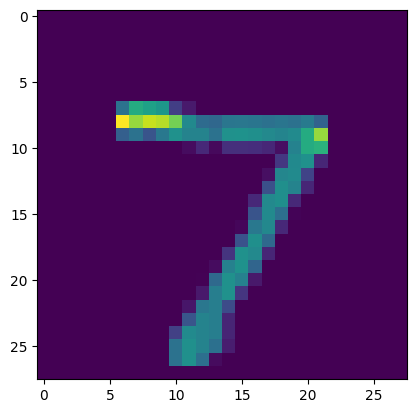

In [52]:
plt.imshow(x_testr[0])

In [37]:
#again cross-checking the prediction o working of my model
print(np.argmax(predictions[128]))

8


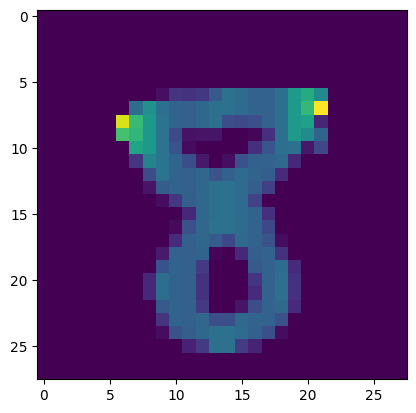

In [39]:
plt.imshow(x_test[128])